In [3]:
#NOM ET PRENOMS: DUA KOBENAN KOUMAN
#CODE PERMANENT: DUAK22129600

In [4]:

import pandas as pd # importation du module pandas
import numpy as np # importation du module numpy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin


In [46]:
#Pour ma propre culture j'ai determine les pays ou on a vendu, le pays on a plus vendu,
#j'ai determine et supprimer les  doublons dans notre DataFrame 
#J'ai aussi determine le pays ou on a fait le plus de profit


In [67]:
#Chargement des données: Customer.csv, CountryPopulation.csv et CountryGDP.csv
customer = pd.read_csv('C:/Users/duako/Downloads/Customer.csv')
CountryPopulation = pd.read_csv('C:/Users/duako/Downloads/CountryPopulation.csv')
CountryGDP=pd.read_csv('C:/Users/duako/Downloads/CountryGDP.csv')

In [69]:
#Processus de Creation du pepiline

from sklearn.pipeline import make_pipeline, Pipeline #Construction du pepilines des variables numeriques
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder #Importation des modules de prepocessing
from sklearn.impute import SimpleImputer #Imputation des valeurs manquantes


In [6]:
#a) Selection  des variables numeriques
num_vars=customer.select_dtypes(exclude=['object']).columns 
num_vars

Index(['age', 'pages', 'ReBuy', 'News_click'], dtype='object')

In [7]:
#b) Selection  des variables categorielles par colonne 
cat_num_vars=customer.drop(num_vars, axis=1).columns


cat_num_vars

Index(['first_item_prize', 'gender', 'country', 'revenue'], dtype='object')

In [8]:
#Transformations des valeurs numeriques 
numeric_transformer = make_pipeline(
    (SimpleImputer(strategy ='median')),#Remplace les valeurs manquantes par la mediane
    (StandardScaler())  )#Appliquons un Algorithme de standrtidstion
   
numeric_transformer

#Commentaire: Nous avons creer une pipeline en deux etapes (Imputation des valeurs manquantes et en appliquant un algorithme de standardisation par defaut)

NameError: name 'make_pipeline' is not defined

In [9]:
#Transformations des valeurs categorielle

categorical_transformer= make_pipeline( 
(SimpleImputer(strategy="constant", fill_value ="unknown")), #Remplacer les valeurs manquantes par Unknown
(OneHotEncoder(handle_unknown ="ignore")) #Encoder les valeurs categorielles en ignorant les modalites qui ne vont pas apparaitre dans l'ensemble des donnees
)

categorical_transformer
#Commentaire: Creation de pipeline des valeurs categorielles en remplacant les valeurs manquantes par unknown

NameError: name 'make_pipeline' is not defined

In [10]:
#Combinaisons des deux pipelines pour former un seul objet

In [11]:
from sklearn.compose import ColumnTransformer


In [12]:

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_num_vars)
    ]
)
preprocessor


NameError: name 'numeric_transformer' is not defined

In [13]:
print(preprocessor)

NameError: name 'preprocessor' is not defined

In [14]:
#Dterminons le nombre de ventes par pays
import matplotlib.pyplot as plt

# Comptons le nombre d'occurrences de chaque pays dans le jeu de données
sales_by_country = merged_data['country'].value_counts()

# Trions les résultats par ordre décroissant
sales_by_country_sorted = sales_by_country.sort_values(ascending=False)

# Créons un graphique à barres
plt.figure(figsize=(10, 6))
sales_by_country_sorted.plot(kind='bar', color='skyblue')
plt.title('Nombre de ventes par pays')
plt.xlabel('Pays')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'merged_data' is not defined

In [ ]:
#Determinons le pays avec le plus de vente

sales_by_country = merged_data['country'].value_counts()
sales_by_country_sorted = sales_by_country.sort_values(ascending=False)

# Affichons le pays avec le plus de ventes
top_country_by_sales = sales_by_country_sorted.index[0]
print("Pays avec le plus de ventes:", top_country_by_sales)

In [ ]:
#Visualisons le pays avec le plus de ventes
import matplotlib.pyplot as plt

sales_by_country = merged_data['country'].value_counts()

# Trouvons le pays avec le plus de ventes
top_selling_country = sales_by_country.idxmax()
max_sales = sales_by_country.max()

# Créons un graphique à barres
plt.figure(figsize=(8, 6))
plt.bar(top_selling_country, max_sales, color='skyblue')
plt.title('Pays avec le plus de ventes')
plt.xlabel('Pays')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# Determinons les profits par pays
#Convertisons la colonne 'revenue' en type numérique
customer['revenue'] = pd.to_numeric(customer['revenue'], errors='coerce')
# Groupons par pays et calculons le profit total
profit_par_pays = customer.groupby('country')['revenue'].sum()
print(profit_par_pays)

country
Afghanistan       45730.0
Algeria           16918.0
Argentina         30020.0
Australia         36287.0
Bangladesh        13600.0
Brazil            20382.0
Burma             19618.0
Canada            41139.0
China             20849.0
Colombia          23356.0
Egypt             16651.0
Ethiopia          33471.0
France            37557.0
Germany           42397.0
Ghana             13995.0
India             14983.0
Indonesia         16851.0
Iran              22509.0
Iraq              20765.0
Italy             29930.0
Japan             31872.0
Kenya             18168.0
Malaysia          25666.0
Mexico            23650.0
Morocco           17148.0
Mozambique        42467.0
Nepal             24678.0
Nigeria           14049.0
Pakistan          12634.0
Peru              21016.0
Philippines       13176.0
Poland            30650.0
Russia            27108.0
Saudi Arabia      33573.0
South Africa      21883.0
South Korea       33729.0
Spain             34026.0
Sudan             11039.0
Taiw

In [16]:
#Determinons le pays ou on fait le plus de profit

customer['revenue'] = pd.to_numeric(customer['revenue'], errors='coerce')

# Groupons par pays et calculons le profit total
profit_par_pays = customer.groupby('country')['revenue'].sum()

# Trouvons le pays avec le profit total le plus élevé
pays_max_profit = profit_par_pays.idxmax()
max_profit = profit_par_pays.max()

print("Le pays avec le profit total le plus élevé est {} avec un profit total de {}".format(pays_max_profit, max_profit))

Le pays avec le profit total le plus élevé est Afghanistan avec un profit total de 45730.0


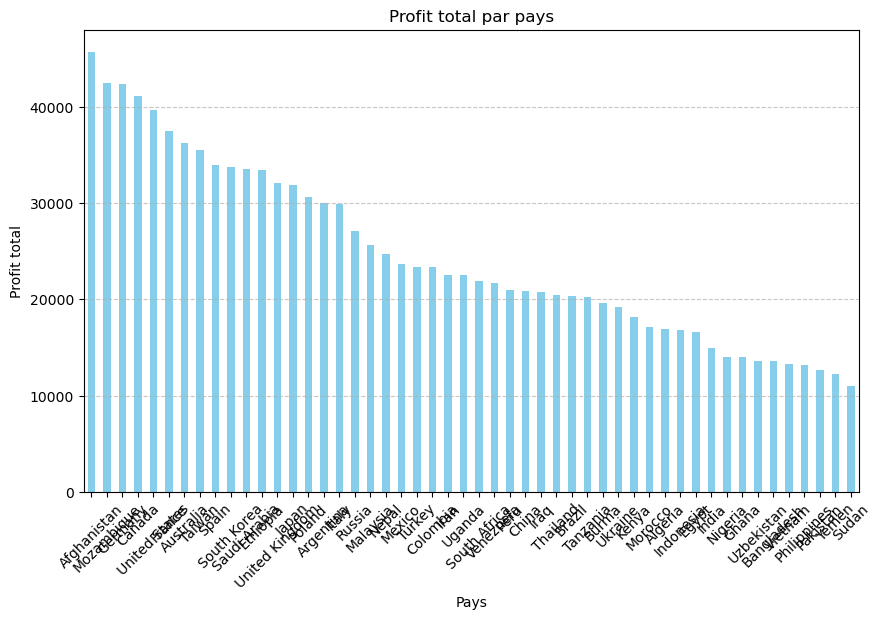

In [17]:
import matplotlib.pyplot as plt
#Visualisons cela
# Convertisons la colonne 'revenue' en type numérique
customer['revenue'] = pd.to_numeric(customer['revenue'], errors='coerce')

# Groupons par pays et calculer le profit total
profit_par_pays = customer.groupby('country')['revenue'].sum()

# Trions les profits par ordre décroissant
profit_par_pays = profit_par_pays.sort_values(ascending=False)

# Créons un diagramme à barres pour visualiser les profits par pays
plt.figure(figsize=(10, 6))
profit_par_pays.plot(kind='bar', color='skyblue')
plt.title('Profit total par pays')
plt.xlabel('Pays')
plt.ylabel('Profit total')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
 #1) Examiner la structure des données

In [19]:
##1.a) Examinons les cinq premieres lignes a l'aide de la methode head()
customer.head()

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
0,41.0,6.0,28.0,Fem,False,4.0,China,113.0
1,34.0,4.0,15.5,Fem,True,2.0,China,36.0
2,38.0,5.0,?,Fem,False,7.0,China,111.0
3,20.0,1.0,44.0,Fem,False,2.0,China,71.0
4,39.0,10.0,10.0,Fem,True,4.0,China,80.0


In [20]:
print(customer)

       age  pages first_item_prize gender  ReBuy  News_click country  revenue
0     41.0    6.0             28.0    Fem  False         4.0   China    113.0
1     34.0    4.0             15.5    Fem   True         2.0   China     36.0
2     38.0    5.0                ?    Fem  False         7.0   China    111.0
3     20.0    1.0             44.0    Fem  False         2.0   China     71.0
4     39.0   10.0             10.0    Fem   True         4.0   China     80.0
...    ...    ...              ...    ...    ...         ...     ...      ...
9995  49.0    8.0             44.0   Masc  False         4.0  Taiwan    254.0
9996  32.0    5.0             42.0   Masc  False         1.0  Taiwan     82.0
9997  47.0    8.0             15.5    Fem   True         3.0  Taiwan    117.0
9998  42.0    7.0             42.0    Fem  False         2.0  Taiwan     70.0
9999  41.0    5.0             42.0    Fem  False         2.0  Taiwan    107.0

[10000 rows x 8 columns]


In [21]:
#D'apres ces sorties notre DataFrame customer contient des valeurs manquantes représentées par 
#le symbole "?" dans la colonne first_item_prize  

In [22]:
#1.a.a) Verifions si notre DataFrame contient d'autres valeurs manquantes

In [23]:
missing_values = customer.isnull().sum()
print(missing_values)

age                 0
pages               0
first_item_prize    0
gender              0
ReBuy               0
News_click          0
country             0
revenue             4
dtype: int64


In [24]:
missing_mask = customer.isna()
missing_mask

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False


In [25]:
#Verification du nombre total de valeurs manquantes
missing_values = customer.isnull().sum().sum()
missing_values

4

In [26]:
#1.a.b) Verifications des doublons dans notre DataFrame
duplicated_rows = customer.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [27]:
customer.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [28]:
#Notre DataFrame ne contient pas de doublons

In [29]:
##1.b) Utilisons la méthode info() pour obtenir une description des données, en particulier le nombre total de
##lignes, le type de chaque variable et le nombre de valeurs.

customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  10000 non-null  object 
 3   gender            10000 non-null  object 
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  object 
 7   revenue           9996 non-null   float64
dtypes: bool(1), float64(4), object(3)
memory usage: 556.8+ KB


In [30]:
##1.c) Utilisons la methode value_counts() pour obtenir la liste des modalités des variables catégorielles ou qualitatives
##et ainsi que les effectifs de chacune d’elles 
customer['revenue'].value_counts()
customer['country'].value_counts()
customer['gender'].value_counts()
customer['first_item_prize'].value_counts()

44.0     2083
22.0     1750
15.5     1462
42.0      941
28.0      845
57.0      825
10.0      755
102.0     670
117.0     342
78.0      324
?           3
Name: first_item_prize, dtype: int64

In [31]:
##1.d) Utilisons la methode describe() pour avoir un récapitulatif des variables numériques
customer.describe()

,age,pages,News_click,revenue
count,10000.000000,10000.000000,10000.000000,9996.000000
mean,37.431400,5.995000,4.412000,122.812625
std,9.490474,2.438559,2.418231,86.750910
min,18.000000,1.000000,0.000000,1.000000
25%,31.000000,5.000000,3.000000,59.000000
50%,37.000000,6.000000,4.000000,100.000000
75%,43.000000,7.000000,6.000000,164.000000
max,79.000000,14.000000,10.000000,995.000000


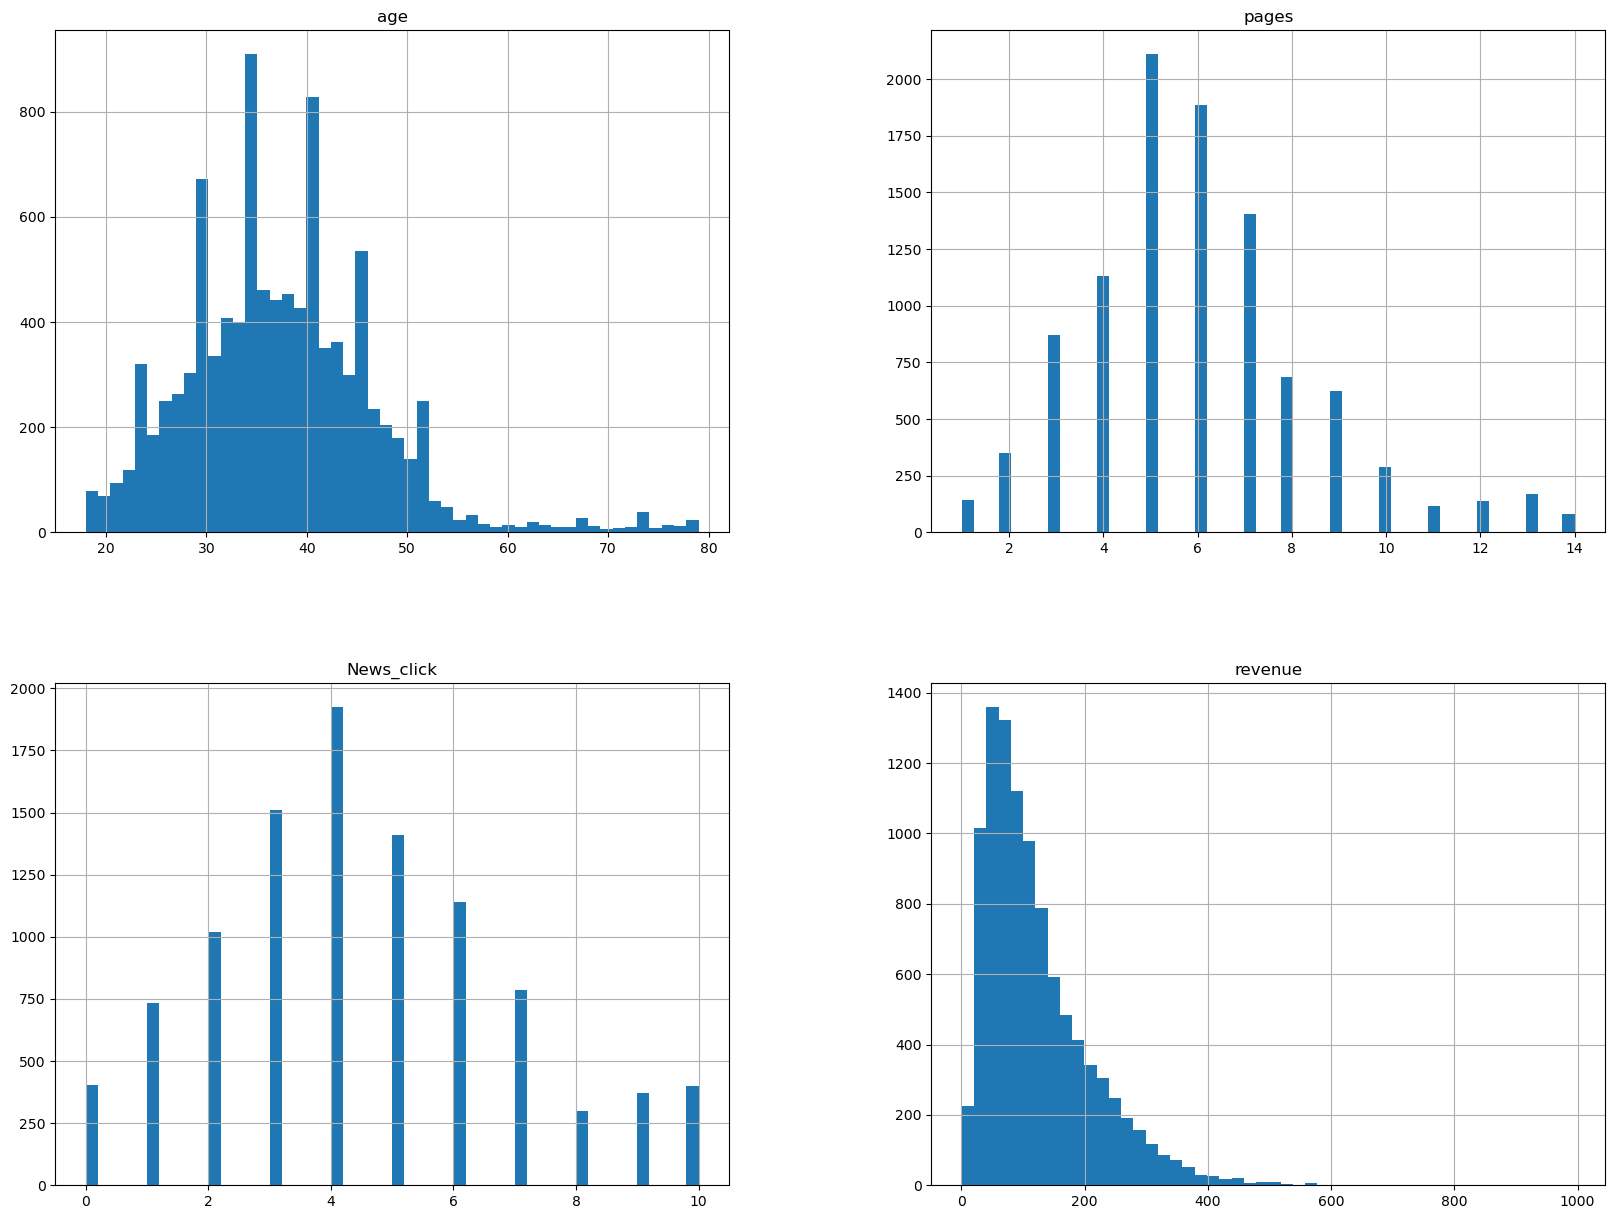

In [32]:
##1.e) Utilisons un histogramme pour avoir un appercu general sur nos variables numeriques
%matplotlib inline
import matplotlib.pyplot as plt
customer.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#2) Creons un jeux de test 

def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [34]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(customer, test_size=0.2, 
                                       random_state=5)

In [35]:
train_set.head(10) #Visualisations du jeu d'entrainement

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
7751,31.0,3.0,57.0,Fem,True,5.0,Peru,147.0
4154,31.0,7.0,15.5,Fem,False,2.0,United Kingdom,76.0
3881,38.0,2.0,15.5,Masc,False,2.0,France,65.0
9238,43.0,3.0,102.0,Fem,False,9.0,Ghana,168.0
5210,48.0,4.0,28.0,Masc,False,3.0,Spain,79.0
7487,34.0,5.0,42.0,Fem,False,3.0,Morocco,29.0
7542,23.0,9.0,22.0,Masc,False,1.0,Morocco,45.0
7524,29.0,9.0,22.0,Masc,False,5.0,Morocco,56.0
9412,29.0,7.0,22.0,Masc,False,1.0,Mozambique,140.0
6377,55.0,4.0,28.0,Fem,False,2.0,Algeria,57.0


In [36]:
train_set.shape #Verifions le nombre de ligne et de colonne de notre jeu d'entrainement

(8000, 8)

In [37]:
test_set.head(10) #Visualisation du jeu de test

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
7054,46.0,5.0,44.0,Fem,False,5.0,Canada,360.0
442,43.0,6.0,44.0,Fem,False,5.0,United States,285.0
3954,47.0,3.0,22.0,Fem,False,4.0,France,215.0
2288,49.0,7.0,28.0,Fem,False,4.0,Philippines,74.0
3196,35.0,14.0,22.0,Fem,True,4.0,Germany,261.0
6178,37.0,6.0,44.0,Fem,True,2.0,Argentina,95.0
8351,51.0,6.0,44.0,Masc,False,7.0,Saudi Arabia,288.0
5658,37.0,6.0,28.0,Fem,False,9.0,Tanzania,106.0
2065,34.0,3.0,44.0,Masc,False,5.0,Mexico,115.0
413,27.0,4.0,44.0,Masc,False,3.0,United States,140.0


In [38]:
test_set.shape #Verifions le nombre de ligne et de colonne de notre jeu de test

(2000, 8)

In [39]:
#Determinons la taille du jeu de test et d'entrainement
from sklearn.model_selection import train_test_split

# Choix des variables prédicteurs et de la variable cible
X = customer[['age', 'pages', 'first_item_prize', 'gender', 'ReBuy', 'News_click', 'country']]
y = customer['revenue']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification de la répartition des données
print("Taille de l'ensemble d'entraînement :", len(X_train))
print("Taille de l'ensemble de test :", len(X_test))

Taille de l'ensemble d'entraînement : 8000
Taille de l'ensemble de test : 2000


In [40]:
#3. DÉCOUVRONS ET VISUALISONS LES DONNÉES POUR MIEUX LES COMPRENDRE

In [41]:
customer = train_set.copy() # créons une copie de jeu d’entrainement qu’on  manipulera sans détériorer l’origine.

<Axes: xlabel='country', ylabel='age'>

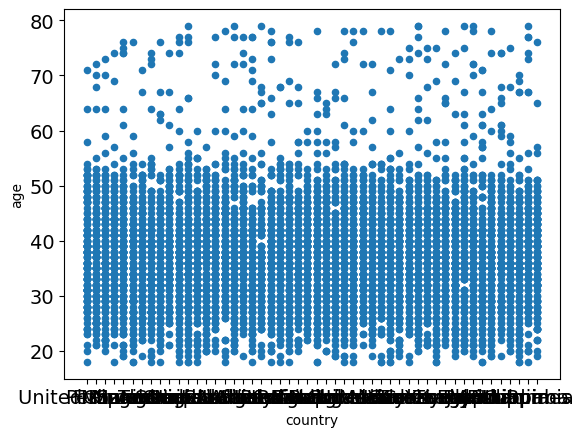

In [42]:
##Creons une visualisation du pays(country) et l'age(age)

customer.plot(kind="scatter", x="country", y="age", fontsize=14)


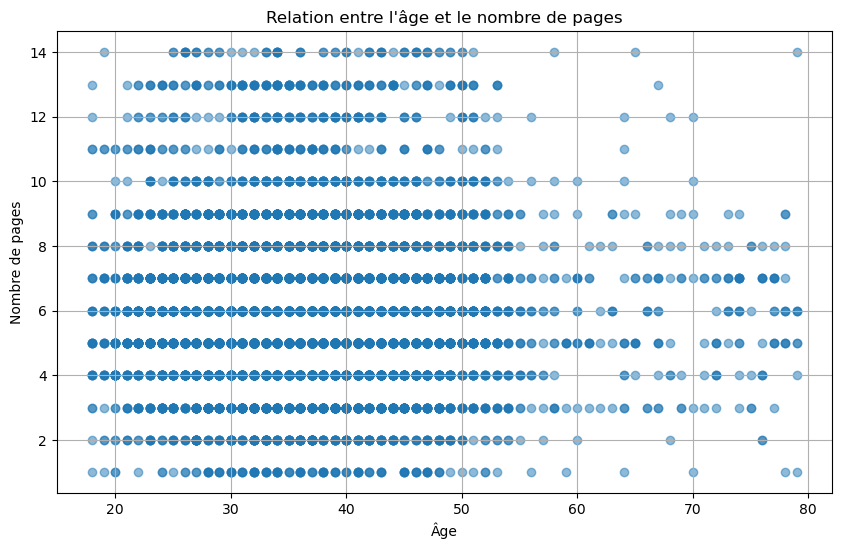

In [43]:
import matplotlib.pyplot as plt
##Creons une visualisation de l'age et le nombre de page(pages)

# Création du nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(customer['age'], customer['pages'], alpha=0.5)
plt.title('Relation entre l\'âge et le nombre de pages')
plt.xlabel('Âge')
plt.ylabel('Nombre de pages')
plt.grid(True)
plt.show()

<Axes: xlabel='country', ylabel='age'>

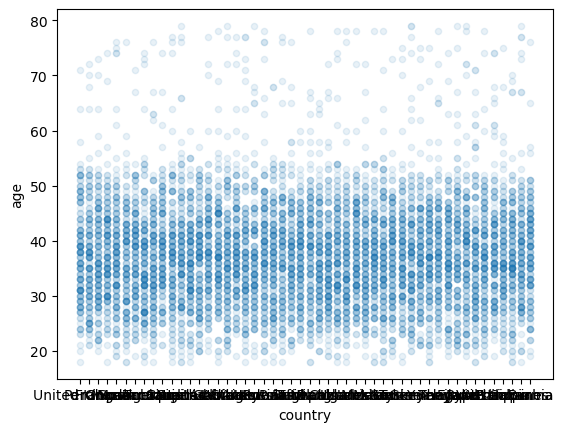

In [44]:
customer.plot(kind="scatter", x="country", y="age", alpha=0.1)
#Determinons les pays et l'age où la densité des points est plus importante.

#il ya une forte densite dans tous les pays ou l'age est compris entre 20 et 50. 
#On donc deduire de facon partielle que les clients qui font le plus  d'achat sur le site sont agees de 20 a 50 ans.

<Axes: xlabel='country', ylabel='age'>

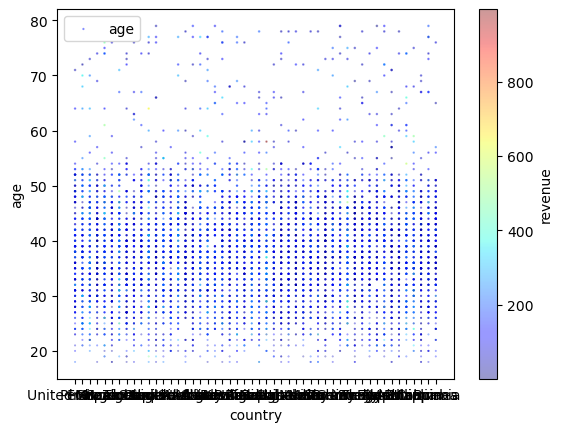

In [45]:
# visualisons  la relation entre le pays, l'âge et les revenus des clients.

#Convertisonbs la colonne "revenue" en type numérique
customer['revenue'] = pd.to_numeric(customer['revenue'], errors='coerce')

# Maintenant, vous pouvez utiliser la colonne "revenue" comme argument `c`
customer.plot(kind="scatter", x="country", y="age", alpha=0.4, 
              s=customer['age']/100, label="age",
              c="revenue", cmap=plt.get_cmap("jet"), 
              colorbar=True)

In [46]:
#Calculons le coefficient de correlation  entre chaque  variables

corr_matrix = customer.corr(numeric_only=True)
corr_matrix

,age,pages,ReBuy,News_click,revenue
age,1.000000,0.001249,-0.003887,-0.008452,0.003226
pages,0.001249,1.000000,-0.014647,-0.011475,-0.016933
ReBuy,-0.003887,-0.014647,1.000000,0.017519,0.118380
News_click,-0.008452,-0.011475,0.017519,1.000000,0.373026
revenue,0.003226,-0.016933,0.118380,0.373026,1.000000


In [47]:
#On constate que plus il y a de nouveaux click, le nombre de vente augmente
corr_matrix['News_click'].sort_values(ascending=False)

News_click    1.000000
revenue       0.373026
ReBuy         0.017519
age          -0.008452
pages        -0.011475
Name: News_click, dtype: float64

<Axes: xlabel='News_click', ylabel='age'>

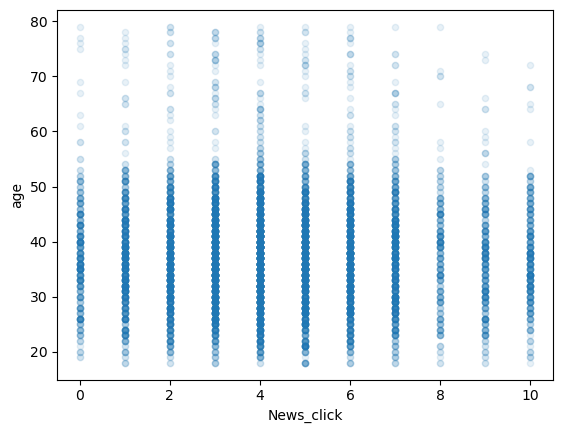

In [48]:
customer.plot(kind="scatter", x="News_click", y="age", 
              
                alpha=0.1) 

#Les personnes agees de 20 a 50 generent plus de revenu car il s'interesse plus a nos produits


In [49]:
# 4. Preparons les donnees pour les algorithmes de machine learning

In [50]:
#La fonction drop() crée une copie des données mais n’affecte pas le dataframe tain_set
customer = train_set.drop("revenue", axis=1)
customer_labels = train_set["revenue"].copy()

In [51]:
customer.describe()

,age,pages,News_click
count,8000.000000,8000.000000,8000.000000
mean,37.403250,6.015250,4.430875
std,9.403188,2.436085,2.413131
min,18.000000,1.000000,0.000000
25%,31.000000,5.000000,3.000000
50%,37.000000,6.000000,4.000000
75%,43.000000,7.000000,6.000000
max,79.000000,14.000000,10.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 7751 to 2915
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8000 non-null   float64
 1   pages             8000 non-null   float64
 2   first_item_prize  8000 non-null   object 
 3   gender            8000 non-null   object 
 4   ReBuy             8000 non-null   bool   
 5   News_click        8000 non-null   float64
 6   country           8000 non-null   object 
dtypes: bool(1), float64(3), object(3)
memory usage: 445.3+ KB
None
                age        pages first_item_prize gender  ReBuy   News_click  \
count   8000.000000  8000.000000             8000   8000   8000  8000.000000   
unique          NaN          NaN               11      2      2          NaN   
top             NaN          NaN             44.0    Fem  False          NaN   
freq            NaN          NaN             1637   5518   5760          NaN   


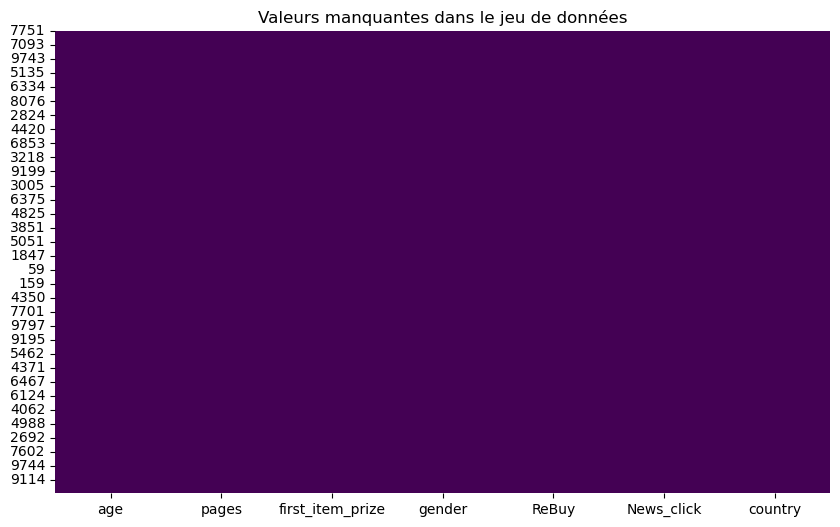

In [52]:
#3.2.1 a) Utilisons les fonctions info(), describe() ou describe(include=’all’) 
#et la visualisation pour reperer les donnees manquantes

import seaborn as sns
import matplotlib.pyplot as plt

# Utilisons info() pour afficher des informations sur les colonnes
print(customer.info())



# Utilisons describe() pour obtenir des statistiques récapitulatives
print(customer.describe(include='all'))




# Utiliser un heatmap de seaborn pour visualiser les valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(customer.isnull(), cmap='viridis', cbar=False)
plt.title('Valeurs manquantes dans le jeu de données')
plt.show()

In [65]:
#3.2.1.a.b) Ecrivons une fonction pour localiser les donnees manquantes 

def replace_missing_values(data):
    # Localisons les valeurs manquantes dans le dataframe
    missing_values = data.isnull().sum()
    
    # Affichons les valeurs manquantes
    print("Valeurs manquantes par colonne :")
    print(missing_values)
    
    # Remplacer les valeurs manquantes dans la colonne 'revenue'
    # par la valeur NaN pour pouvoir utiliser to_numeric() de Pandas
    data['revenue'] = data['revenue'].replace('unknown', pd.NA)
    
    # Convertir la colonne 'revenue' en type numérique
    data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
    
    # Afficher les valeurs uniques dans la colonne 'revenue' pour vérifier
    print("\nValeurs uniques dans la colonne 'revenue' après remplacement :")
    print(data['revenue'].unique())
    
    return data

# Appelons la fonction pour remplacer les valeurs manquantes
customer = replace_missing_values(customer)

Valeurs manquantes par colonne :
age                 0
pages               0
first_item_prize    0
gender              0
ReBuy               0
News_click          0
country             0
dtype: int64


KeyError: 'revenue'

In [64]:
#3.2.1.b)localisons  et remplacons les valeurs manquantes représentées par des symboles spéciaux comme par exemple (?)

#Dans ce code, nous avons créé une classe ReplaceSpecialSymbols qui hérite des classes BaseEstimator 
#et TransformerMixin de scikit-learn. Cette classe contient les méthodes fit et transform
#nécessaires pour transformer les données. Ensuite, nous utilisons FunctionTransformer pour transformer 
#cette classe en un transformateur utilisable dans un pipeline.
#Enfin, nous utilisons un pipeline pour appliquer cette transformation sur les données.



import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer


#Créons une classe ReplaceSpecialSymbols qui hérite des classes BaseEstimator 
#et TransformerMixin de scikit-learn

class ReplaceSpecialSymbols(BaseEstimator, TransformerMixin):
    def __init__(self, symbol='?'):
        self.symbol = symbol
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.replace(self.symbol, np.nan)

# utilisons FunctionTransformer pour transformer 
#cette classe en un transformateur utilisable dans un pipeline
replace_transformer = FunctionTransformer(ReplaceSpecialSymbols(symbol='?').transform)

# Intégration dans un pipeline
pipeline = Pipeline(steps=[
    ('replace_special_symbols', replace_transformer)
])

# Appliquons le pipeline sur les données
customer_transformed = pipeline.fit_transform(customer)

# Affichons le dataframe transformé pour vérifier les modifications
print(customer_transformed)

       age  pages first_item_prize gender  ReBuy  News_click         country
7751  31.0    3.0             57.0    Fem   True         5.0            Peru
4154  31.0    7.0             15.5    Fem  False         2.0  United Kingdom
3881  38.0    2.0             15.5   Masc  False         2.0          France
9238  43.0    3.0            102.0    Fem  False         9.0           Ghana
5210  48.0    4.0             28.0   Masc  False         3.0           Spain
...    ...    ...              ...    ...    ...         ...             ...
3046  42.0    9.0             22.0    Fem   True         5.0         Germany
9917  39.0    8.0            102.0   Masc   True         3.0          Taiwan
4079  35.0    7.0             22.0    Fem  False         4.0  United Kingdom
2254  29.0    6.0             22.0    Fem  False         1.0     Philippines
2915  42.0    8.0             57.0   Masc   True         9.0           Egypt

[8000 rows x 7 columns]


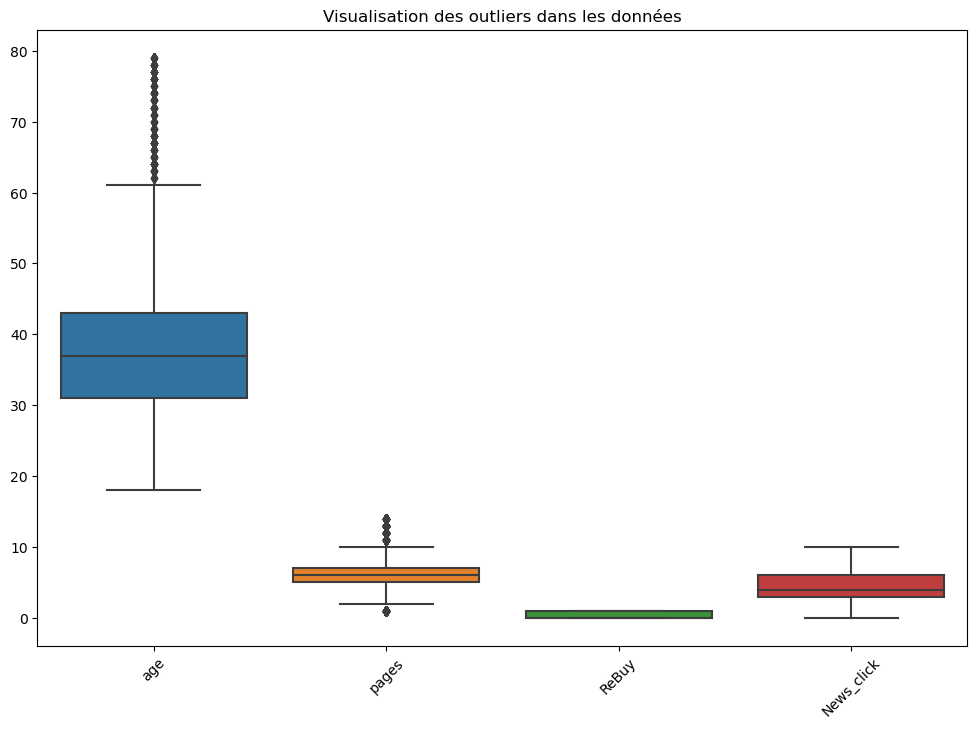

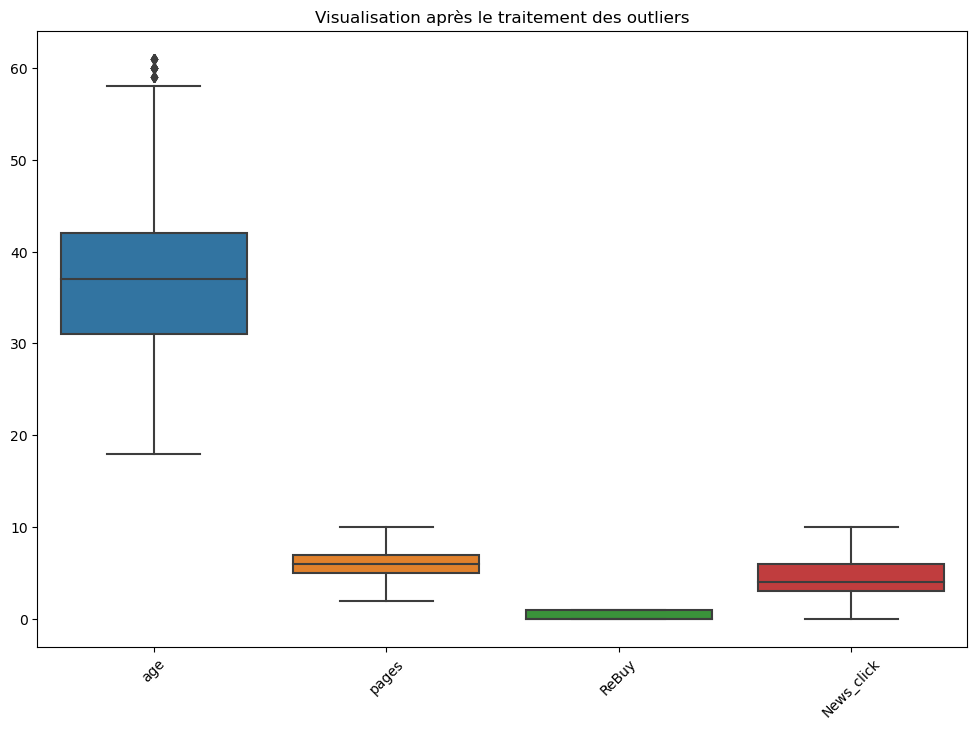

In [61]:
#3.2.2 Remplacement des données aberrantes (extrêmes, outliers)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Visualisation du bruit à l'aide de la méthode "boîte à moustaches"
plt.figure(figsize=(12, 8))
sns.boxplot(data=customer)
plt.title("Visualisation des outliers dans les données")
plt.xticks(rotation=45)
plt.show()

# Définissons une fonction pour remplacer les outliers par une valeur estimée basée sur l'amplitude interquartile (IQR)
def replace_outliers_with_IQR(data):
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[column] = data[column].mask((data[column] < lower_bound) | (data[column] > upper_bound), data[column].median())
    return data

# Appliquons la fonction pour remplacer les outliers avec l'IQR
customer_cleaned = replace_outliers_with_IQR(customer)

# Visualisation après le traitement des outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=customer_cleaned)
plt.title("Visualisation après le traitement des outliers")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#3.3  Enrichissement des données
# 3.3.a)  Nettoyons les deux dataset (CountryGDP et CountryPopulation) qu’on souhaite ajouter au dataset de base (Customer.csv)

#Nettoyons le dataset CountryGDP
CountryGDP_cleaned = CountryGDP.dropna()  # Supprimons les lignes avec des valeurs manquantes
CountryGDP_cleaned = CountryGDP_cleaned.drop_duplicates()  # Supprimons les doublons
# Nettoyons le dataset CountryPopulation
CountryPopulation_cleaned = CountryPopulation.dropna()  # Supprimons les lignes avec des valeurs manquantes
CountryPopulation_cleaned = CountryPopulation_cleaned.drop_duplicates()  # Supprimons les doublons
print(CountryPopulation_cleaned)
print(CountryGDP_cleaned)

In [62]:
#3.3 Enrichissement des données
##Creons une classe DataEnrichmentTransformer avec trois méthodes:

##Methode 1: __init__(self, include_GDP=False): Cette méthode est le constructeur de la classe. 
##Elle initialise un objet transformateur avec un paramètre include_GDP qui est par défaut à False

##Methode 2: clean_data(self, data): Cette méthode prend un DataFrame data en entrée et supprime les lignes contenant 
##des valeurs manquantes à l'aide de la fonction dropna(). Elle retourne ensuite les données nettoyées.

##Methode 3: merge_datasets(self, customer, Countrypopulation, CountryGDP=None): Cette méthode fusionne les datasets 
## en effectuant des jointures entre eux et en nettoyant les données au préalable

class DataEnrichmentTransformer:
    def __init__(self, include_GDP=False):
        # Initialisation de l'objet transformateur avec un paramètre pour inclure ou non le PIB
        self.include_GDP = include_GDP
    # Fonction pour nettoyer les données en supprimant les lignes avec des valeurs manquantes
    def clean_data(self, data):
        
        cleaned_data = data.dropna()  
        return cleaned_data
    # Fonction pour fusionner les datasets en effectuant des jointures et en nettoyant les données
    def merge_datasets(self, customer, Countrypopulation, CountryGDP=None):
        
        
        # Nettoyons les datasets comme specifié par la question du devoir 3.3.a
        customer = self.clean_data(customer)
        Countrypopulation = self.clean_data(Countrypopulation)
        CountryGDP= self.clean_data(CountryGDP)
       
        
        # Vérifions si le dataset CountryGDP est fourni et s'il n'est pas vide
        if CountryGDP is not None and not CountryGDP.empty:
            CountryGDP = self.clean_data(CountryGDP)
        
        # Renommons  les colonnes pour s'assurer que la clé de jointure est identique
        Countrypopulation.rename(columns={'Country': 'country'}, inplace=True)
        if CountryGDP is not None and not CountryGDP.empty:
            CountryGDP.rename(columns={'Country': 'country'}, inplace=True)
        
        # Effectuons la  jointure avec CountryPopulation comme mentionnee dans la question 3.3.b
        merged_data = pd.merge(customer, Countrypopulation, on='country', how='left')
        
        # Si include_GDP est True et CountryGDP n'est pas vide, effectuons la deuxième jointure avec CountryGDP
        if self.include_GDP and CountryGDP is not None and not CountryGDP.empty:
            merged_data = pd.merge(merged_data, CountryGDP, on='country', how='left')
        
        return merged_data

# Créons une instance du transformateur en incluant le PIB
enrichment_transformer = DataEnrichmentTransformer(include_GDP=True)  

# Fusionnons les datasets en utilisant le transformateur et retournons la comme mentionnee par la question 3.3.d
merged_data = enrichment_transformer.merge_datasets(customer, CountryPopulation, CountryGDP)
print(merged_data)

       age  pages first_item_prize gender  ReBuy  News_click         country  \
0     31.0    3.0             57.0    Fem   True         5.0            Peru   
1     31.0    7.0             15.5    Fem  False         2.0  United Kingdom   
2     38.0    2.0             15.5   Masc  False         2.0          France   
3     43.0    3.0            102.0    Fem  False         9.0           Ghana   
4     48.0    4.0             28.0   Masc  False         3.0           Spain   
...    ...    ...              ...    ...    ...         ...             ...   
7995  42.0    9.0             22.0    Fem   True         5.0         Germany   
7996  39.0    8.0            102.0   Masc   True         3.0          Taiwan   
7997  35.0    7.0             22.0    Fem  False         4.0  United Kingdom   
7998  29.0    6.0             22.0    Fem  False         1.0     Philippines   
7999  42.0    8.0             57.0   Masc   True         9.0           Egypt   

      population  GDP_inhab  
0       3

In [ ]:
#Aplliquons le pipeline

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Définition du pipeline de transformation pour les données numériques
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputation des valeurs manquantes avec la médiane
    ('scaler', StandardScaler())  # Mise à l'échelle des données
])

# Séparation des colonnes numériques et catégorielles
num_attribs = list(customer.select_dtypes(include=['int64', 'float64']).columns)
cat_attribs = list(customer.select_dtypes(include=['object']).columns)

# Définition du ColumnTransformer avec les pipelines de transformation pour les colonnes numériques et catégorielles
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),  # Utilisation du pipeline de transformation pour les colonnes numériques
    ("cat", OneHotEncoder(), cat_attribs)  # Encodage OneHot pour les colonnes catégorielles
])

# Transformation des données customer
customer_prepared = full_pipeline.fit_transform(customer)
customer_prepared_array = customer_prepared.toarray()


In [58]:
customer_prepared_array

array([[-0.68100843, -1.23782163,  0.23585982, ...,  0.        ,
         0.        ,  0.        ],
       [-0.68100843,  0.40425996, -1.00741621, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06346649, -1.64834202, -1.00741621, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.25559419,  0.40425996, -0.17856552, ...,  0.        ,
         0.        ,  0.        ],
       [-0.89371555, -0.00626044, -1.42184155, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.48888073,  0.81478036,  1.8935612 , ...,  0.        ,
         0.        ,  0.        ]])

In [59]:
customer_prepared.shape

(8000, 66)

In [68]:
#2.1.1 Creeons une fonction 

def creer_variable_binaire_revenu(data, colonne_cible):
    # Calculer la moyenne des revenus
    revenu_moyen = data[colonne_cible].mean()
    
    # Remplacer les valeurs de la colonne cible par 1 si elles sont supérieures à la moyenne et par 0 sinon
    data['revenu_binaire'] = (data[colonne_cible] > revenu_moyen).astype(int)
    
    return data

# Exemple d'utilisation :
customer = creer_variable_binaire_revenu(customer, 'revenue')
customer

TypeError: Could not convert 113361117180unknown5112811410942281659340311601887339235106666111817019265425769401302241231211918085419010873130109544974258685287105245424579106766512513048461211432341916636139115132811093715621557242386670345625560118961245932766055166298559524110361249521851176739521201029511289179193424158872585221081712920810511336941939237271108217814213175345057255968422541171314017118412713060543592835212911213146104157933814065561935313161163671588640568015713715955771061149015085304972074985545310056149863012128147160222656261288021176194374587755178594951137144578507415420286023508817141123492918422823322212319501516184694313146271161231336728557833486314019770382166914531171534640203112850196392896414342633335735755348311086635646715234104515444697674189110553412678447816114103183343642899147100274166566760844640162193262185168110762869424248751332377513214328712512973213523162955852115702910695181914377733130448413055521497517194133203283176147362113352144138236268140683092114221352781463703861357927221723014898180160868419585145144168239341682854372872392941452589510623921111183234287285270354266156136115992551752741641171622926812430335111214510721121116923523519831734512149097173236175107882851723493552422891509497912721972981246312761130132294207244999616430126528133522321430914536276663262941446517315136014837913318433011158227172316159107100178134602012962058614331129673230270234395187117893176146565115116255101205297112451258264579617729621312618019810098110226210189125842172803410811982316933734867464241471126553481079499152571731411447527564725659571161019652569974306414411534116485834120752143399645217142119143509746122114111602719590677581541751475469657126127921429811843673183179462310075863788659262646495122913827361781714710958512427381832192294971434494125480818384542811947465273786611524141245129981990942508753995377413381932449100123599841763919250159467478862410022818362107163993347328210484166151381199363301434511646761627411013552501111658713354461032011834515817993465943157573628221596911211824649318389981483613075208172109567094244313244591861761644611112514936653479676011011045361731609345753719936117507519872140125567050788618341114247136244641881401628077792494520610613139168122926453541305112246848694771193756168231721785741911161626113078567371331964943162168587712642289693896111781846612816524620494527081330451392473671231506993134858942281215441117145696812223610735849416119101262327489370402819358287878452210353812764429820117231346810336732028106111684139465284674440332651221871537183838555106074611124531171414393147241376213867935592010856457585165295895942139109923470635736294345164586318131102646557654643917190646926585520952675193957574021180673194665117147453724791402214417170678988733759721519249384754719983245945491228103675622798626420667361535919111675846461182661940755038131013114526275641104103189537126105810368231113831448109126465714830543065575861101unknown2781653327343333638910845914787805617681934593797752972183571375478104962173503759312510011418474113427174294421237629536291066359309255335795522319987786111618567520913114315533668366117113275155953911120662018547648918934174589211936717233109379070375886241468101221944362987679971635711210454218097336242126821702215656427092154942012938285172329311519862449119347892578183174529255019115123429541212624441750508797214354241064410811434125443574442776216208297551513764415561121689236813249421943546270129158118231001211011648615821177829129588512442813751206332103104174118515875284126175307968041154818882890322512510946401403861725030196503834293020701561598168222124453654838297194447131142149906594771370664147129158234597725673438912346832251263735322048976888145304138293734143112307336225516232791756899239324193786811413053194981261491201682261739566194138452881854277146165514212610719612132100633412254358235284866615927388145611012471461982051868818759154737915632174321751916941219179149181382156986214611281172468779521922061577464132892701751142001998411620080711464014011728413275261253346517414145921416613326172304687220411116815891611801302331988210679235986235416761471281326166152114154316270463313864188332127150411251909434617310218426411011818115921211417415392149237645513715846441602113414718113512771138861592031277053162701552316023217366607636212222520671204861503493862781099110816719812410113726449105881944621317120617416314156156257651821661291488123523112723312540287227112321228358513222220177239962009011887169573291891101141231689926821368263235571101223167717414710714583224247281189167781131521736118090224948011815474251254164895182118302211711532515117410035828924320613423312629034648117196631068524412216711521939486513485176152153649014060283449136211130711233858317215711310521689130178172222113541082272991081271213367156unknown1125516511972199138651205512355172381432301309314522821456124485014411317313716316687537871104821591427118488133242147180160881966587158907028114038578868169115141947497126821971321066180625314378100262981716615149110401048713839224155114881562236116194972081351211283110320214911119710981466779121502011871615792134183208193169351192815515588889613812345138163709310372431571121498817524376767083172891691178716172145308621722099620454140221111947511783471871543320610079421101831031411261388087714020097871776340792010955322829542629110285087711194351631692100844141222890787346116827079734880163578130130165274022304534802392859691335352806765955743312530103874338432481004710393507232872924074391529268683615730636345495214551635552215276125465915272005975426239110584819289188312238603129641176731036480488717876690842236457171972890585465513890108687829133145938483928399820233625610450996275537846802333377443313337138575056606818259106463636116311533341187579203413149843076112331737112616980604880829965124899354112417819152510066227036407710370382710741384827573364638356180847753106751869747314034518310958356412859241682152358596273036336733806036226639932540336316788339248192828510077593135424693221505051277679235810948663854124461630835611574352281838743132627752949162100399410175269814421101254846186353582723969482622310061515941331001173968998418126023820331125010017297411412437527697144293128109609211429294376260172102228961732436183701079030314981342253242301143281296160682768124956411113921666330911444941711042972041668620246962409969372006825220911417838201404490391154285882521631969717993991789018082101102271543691452535821694121180741307011922412611161314052084116334514717011525995272991838216921163210851178224611734131718659111116200165973102904930920371402237127168453381179274113181851734050761115264894036690431801642251351009524785681271103997198124242212507334431456016735731164872971441349260128802012096297270621988179804673391023976681884415353905232464914818461341055137651201541021491134310330646014958115963510743461919011113139136247712587376562297888619345705667132999311365707248961044240145923317073372644701123782253337734263227601054148121599891112122616512271130278471071836723120153436460284931383432111342626844860128211592852131110852484103214109951175512438115821666816756451373555170451399631112267826662228332151150161211140443345504709836322010318126712612328712630720323212137717523928855157793083575201832921302431171554523714824716322422620426697285138185383132578512721618623930128120824924543426384782723041531192872602673866115322082133360238161841722391291863522271282162091359732729012813129859334113181307655776168113218609270245361131411834041862352781873812744313917618110599196949113220210022320510910842921799345888112733435851523811020131288102224188255253267239242262346882671862111003351921276925826927726918524222015535338712294143257181261485250177875935134115137105334519316976904360721081704210012039119345628919821166921428318399209136383736611062228111123339121783112225034822138841811995687148652354119170149851481431823699841436743431005212847200432563891841584612416186353263108163247501461264115213759183120827614023058169183126489682767017642199431991911214168167194897366685712598512071414911322593411201294812413886145208224387211712669142621667627930013367106552546357491457968173409896331942792251008686133113771101171404156491365943321941284911629110251761091135364533043248778410756131158551411382359661708112913542409213713215142178632641101071691592219880129100153814387202346905517167997221310990127889013280742951801711541704913413715246132898090801856048211247255127117511187111930134148255249798194185231188756213111434113354881831681141531021499771132107691503674502421647513076113131652149444129722028517017159402461558515556161164256110117225159112681171996817849325594204671482921280571391447698108172197194110605014729116513213666205731067490258117160177711577262241118110550102394821213412920311475375617918885403813611285121121561928317934707710791266871683222785182129527714967531203446117644157617410614612932117877468936112810536515738115170143149139218381205713215761981155642662214116410315275011794505689166153151104182451476113210512528611611111886107781413291124126897463432278214318784804932921518039391178085967843164681361062617461102138109514154756911910710016552861141413313822151254313710212097351011071085021516827497329275109315227219248231275924752181591334719997112193160985332617976212279309798411016920215529014815017824038104291119177259329203202124159281164239179652008719651239181441532227024517133210576285135335228782171406523863253275282197192251248161136962513191891317821880436200716263107247105290219187365730212316510211811419570277147199247291200254146232236300707141861832946278184191133158796044227636234118224517721515825619323534612317520582241283235313141351132303349174288353290144562725020779226143611571777025524319790983072492452101621832935436722717113410318518372689160167891181031642767917327212279762221672281191452473622072571196364232702924323019818422134681182188967796874803142127830872971631729423628726715159181155239194113628810643892167912981842761869412480223409317055107562251811493221911681501408524725727223611323321110333271141462511568417933219194292209138125116223875812098999625611211728974217323255562631953428216422818136212174761582602028820164278109226727986393307935791198214123987621951272499330164209229235163751851032461721645399234352801704770310336263244219684725124870296135501211829296167237533791701306325012113823220722222398518910026012211666190210158149142146137414931766157265371041556856219243194228256121493145314514619715319242631104027497621401303322223969919496122361821313071601276021211062256130111338856214624413670903181281938010810482261186811820515522824290248626847239461751946891251774422424717332418517137233761861542282242179210555802514284461844813124614122414387762648316228062982511137013521711016825210743384711221852221742941145859641587953941341082461161943376404646368320482683291359103126602081191235215264159109394013132234424513516523529511610610510153546088593865787823123371271521526612936217544916812110322559959534756237217324391241125891401241206837434094206795189421871092135110218773484134115155431773284127136113124998524012627513892415943626135154189184427659141559138272100727128413711910927371017046372191141482672521261091317428843950554777128110131252665194676687138166146610313710063511416566446925924336371251441406410113631013393537697923250671837043153110521844374869159202137200951035913445140409112660288113541241581501261393111284014474372970122541141964810454141129147241361041812511134784491075442578763183378895776116211421463118865493565311113522110485431381301175112221674632316783291487743401156818775104151198982181091457481615272183959132904021556189598534244146207112117961004610736933612328320049125180142170164209132451439234118651014212420146103581531042053814290157377216421192413295110185100262866323025228111723592103130476819172260187365551051722474592591482042001131079987143173871601641649623111622894137380138234104272676621821918815172175191224965324675961833182341203019960901922887721327012418417719717011216420115121355246107803082661433617316614212288671701029733425211322116817666991681816829917127111516622228153701433082421141106911710035433117711324059440431381461951571321192421152432111017225958154101138313120186244221126711261234021312608737157246154157113204173266146562431061403062442851862971891308818218315146119236310113761822172202577376126428219369226701252561371001487616942354713311120412238321101441165126961161225927312811719614714011621164248293537189134169137116189245132401338511510113650149391011212561232184181113119715913371997211753634916010469195489424690128798721262394552135801358474987971106513312410619297158121200126154113898254942283728916646142911401821521394460274179125181714734164135733913336104101702771091693001511145611556234166246810411214711619923744710160113681121148946813394146150169601161071471292612792971181932213785283792962492871222617631666892401396116116094872431154511968274220196320983101103225157296284180146232701702448117127516458498691196685252142964002799461281399416428928472152124111269115711912052182061821911159310222515297348449512631301681211382581237919511810072294873614514519412010012211832278111260295363233191213188688224392364204150942921382078066510141105881894269120136653011903571701168319128211090267277305280106163199441193581142191572486939810812262722642271043012168613114228821274652021051151262342941041923871931453652185644585169774938632761184135251116915042108110158164517625891071327016411477931346739851645089272773797168160119150872648305364622038932815764243140413950115781239988901781628811840691563636193463212012773451617052474815551589679747712225697404466285196168112671452456911014774895440332094953162125106441051293028111372312457117374469103121514528548987142102109893620611450541984935264414512591129851265954552524134731469226117124157513540605498771021037213813486888310751159878611978931784212110522942911421201143317638501347910913314311116616954717935431148677116161984942116295129798344171068222126603510615889186369865288763701031621079244561088714617368503699598107139732221235294508999200429413916227511215734501082420114891925865118385010468907943551011542610113023512612866199487610516764103109702093831642381007512013011010612913240175285116211179118112157100358613627317512452985113874453710610107597784512657419190135701471029337558995106150367632196521083666664430619743853610537705890551299012060144511151384062726172457115626411967151882154123803759513110063583913310760204667412913410211631917942169232343721252055488724763596614346118155144868582651603623594517510345135179719078644699587424914010885721081231181511111021444513095148239312427138207344344779792377072115971643313359194132605782748161751172281019793751766178112666731371016861641211005936641301231354416140117247624331110232118128435467526681531082211108210938711862581161543045081259112761316413117617911719326013413914815813576118972092083759069462202193291781677469127192235238941128211320416659137872751761381491191371491462531431146130714810998102281527722414614918725022261218116207132381335310183248611716015583252118219999322412211816511784174345218182125100853711701291241161586517918641259124206629111812875186127244126144177162592483021442591053110311215628423816310455256275418192041956012512321131212221656144981126710395255185122731272171081252476221111327448881761131863061195170605468614388511001242969251325262139554389103451042581221144631185401025426168237727017318816711946439336441075167914982395696120175321156111334791301255932286463874421123461281026177871212857285654699299362276723146166276047177133475854471838163229961155323980122121192123175149747466116232767535595408128159766010525989861231531709715263316315425150170141627112917212860617912224261185181113586038214862125571711551468095124129532935794778433217439126136726111313033835826013245104212102137762262631411332246544108122106215712431269721677825087272277103147160361057213615258159158235123108195145197631423391602341581256659101122356113179182177288712146574931317113226356207119166130294227231113871981737620255122256138257951618110817368366941393873491968024556139110428119206177561771371312074023762072487818815621817153187174151721691768051504823950149143145214120139284412616489861914618618620620517718216618510284192149937616630887177178231899013861389100193951551706912183701681381131311638019599178869248841351062247304336751943992043291124214508152471711354395731413947256741223713934811671100952174367343242874594352895249311076589661003057413623682248655740191011022663655476619572753284349478419562755586528703693109367941474030277888702337271155979874857736733189415513491212331691864515372930432471868404825343670426378202611715811874711163077304942541964703443506241185172581001102148435030251355122555722582414610086655614191139862331041181511394728418559442961394225579881701088270131612626313391131109775372141145661301158901191041234414415871432826331981571427911668741151594278176202055388643316634551581298710865828011711414011691236132116138131427829714672581126828149161124708463171441418625934441716110320033733271135163612017497112142532802023748250208471984982101183577593411246118176189113655079123645816565882269114664711171041459928215640581349286180602822497475419499141771625729076533912090145143138325117107233290189173387416318241372112172149332253202894138726113927791251672731607129925445223227474598933621627781662803141481191718412236030710514495370288333110199692781491829342818741924510714426552212348130231122271333324621361022428932928893114165222321313221128614210932453277112125118324621291971141751408523225913128613530421127010112736424626333733021526324360215422621731918461792839022918515478468108218186712372744717027459465113265486241659542925313611597198139237221972191404432192879414822321109186187482108182331137642145883483551442625050140148571268888245134492778132153511032521570146753168117146575231161141198113727722292696321212199763635222441114108139341312056974131126471851206112595421185452151459835320112541186620939264391054563815512752888794689090661692901174493491612023429201926614035603713212514068897999229104794621979841893290102734418314615139761503110589115100329332323991449588776015717521710676374216419073331853225097681065717484798756102592211378916298569367391314815442220106741714911314415610364109982766266712611692223231721389045192881193388136114715493744135603410450111134702327674365814830228415653846935685729877921238814711455611894991281373744273010775251351001661752812727200111261002959198677642930148103101353321341374223675521581992523123148146937111617463116124569756461006510212912761374917671343149139971634586398677947582242881115158771528585172124137714014230944751417274394232170561047116638110476721100112108683663253279633811911997299433640761783379139272813932793931209515214724145187811084913510710840129846617267441813637145181871637963721381061076890471161371001131071732391055418912415830421306424611710743873483546123616113212014515422771241315958905366143195231106851434816866148196177724610314014496223721315339521257185120131193425334117797697803432122200831111157113314937742009989196778981089874107147654011542241221527115882201451201201041113952755613313277205207130672491511231206415310725419879421152124643893658180181134647241056249882637523845566426507960528473742972102135161394632764164191013554533062615629301103607459235547237149683641916613626812430514355321025534511055440496393883794451654397572315077518611336251123937335530316741302198968294529254015462292229336206537283383557705957673373336850832262829612150984845928917135104919854460447935504729376895617810132115953017391502710690622822163265728321537845592341234289131263243170101371648645206511181431231295243139775027798401911141272541921251431242261025921223911033314337057751302091654844563105195549352303120813686425188115502086666377763131162148129180120107114133145128467817411718734296577119636832042031937163257546215917963181601461931346517751451402191591419822019719467501516040728393161246437213918515741626186502041466991777331414013058128551442469121716834418935563601202001346238538841004163175214132864721479771531874610116362134120641561621991601381086610012310312644252461581522513010187151726259441692958313327521414624023118923427811518124310771148113212959120111620822819716218923564673877334158846312030316619959150243147119219190205289210128216191697426825516115723312078136111165119222108177482898321198715828276681011241023621661352361653812208912211823590731482262481847613277267992099716715413986909614113365130432771203757125518719613723544913815227819528329098651203101962038422596288170209170951582339012068279161729662316223176701531772051382211922651841991052522369773289221260208165269922601593432094141121148410220684731463750245660912986479621410914078109256571011181021291191532960775714362502239528119961521111306214453535410365131961062566157881082062323948316254123501281195753306512150441959511123443752241581089811123595642105615721110169163116222151129602493460411621194610759631576856111137101155125121194115581074556481502993706068153137128105193174439341489411413531810329528458100424323813711827697611212153312045285212971955810037861908310613139732310210786198601807958635193119441274491931734512685537995131216160112491381744315176701265612768531263064514515315210879841021961371311476119199661051728177981361061541502155717314188134544917212782764217014325118100811264178642102031751691291741782226614071113111168229320112203751381807123514855128824716556129193552101466111038154731632023232091024123097501714840123131951887314625243765812520371224541099476992365622727114413265909580191109901321841967310287234094200132115181113722121757722511750104125306961124152471041056819346120114179204158229971501611777214718131426356304118932004308611395452172603291042373852512912791731322551933267917423929419416918162920913414930015350613830522019720393207405368100984481471223991495223263372532751362314382536690651462261701552242131702747821315526845299514716554981945032711761993216612430586220185310338253212264165425308177968720718116828023432916171167782173542821185321411162362793699711844410195329115308212333270121971553291243851389557656315029526249717619180160200142116351188323168180288103507107114452198122353200842092292091496017927211726591129422326122314369411238142109240143624838175171181752173503160269021120542219281667193430968852894920363386987342550311731121291526161271525515037586762301714621630173447463752681111094642991104912926057355235732258765424281237365156381131043927156210749167303868578181903812410210360337213791495502212405534305613657209544105222115920323521964017351267170952412177647563121940521618314519931041817204555491099662371992069928183139952761571481137160837750129074482674778957160267411385474969186841349113124638638293535149351071171494946111104205948311071681562265488149165874822233394367141133711759365020301611961120981033420597749625952814512451604863683939751367165371632885859144234945727302863171587122737187826224569211603482421115796454532816537755426488247892998812035232321582848851915248993520443338882432423855818862175339222942505473111124523762323914552275381604933412877743437414762661791098230330528720033524120299248161140124211333631043232221201951492382302902503192646130310757127018839927345067271671252045083021972351352141472481379210018811511010422928817623713532926931849219631313831434223193199252421644153185110331852061383372541311161083071771089331739188107275227671411272262902283112713701831898814712435024324622514234221794163285884105101371411124821503066225111333198306185145330921872332322802492691023705857222612388244305693931361262463112313616056139105158101811823701032781281672841732999226417720940424732893223942273461513741522661122791618327080102581902003431102012163013121002441427816025114212011779233141239153243185248170172168152235838483701575115060104912023712122733792433523956815721751162791833498720930344517214032575151158792451121211597416094170122368665844255564173318305200265293116242581741601612032307617527417418220931311727021381202126399141471051341206915281611853381682143052582621452121202431371446114129168122185323220112167180202170190131167153268133106124681201351909112263177258171296537323403475104119144116115287143222129214212352240121228104258249401951902979841134113972092281001883112881042901461463262278712329216545171132226661083581731307511925421822292191267unknown2029837517021440827612937136022662132161802042531386890116163407135222903902961298177316268282216225172692902951066915511796237276131199240131833404091160179888375318812601832217873112867443110360206265167171255250319931441031127731617514723415912872165751702862605974243160803532661331021963031021185623716863291323188109175260143537755152300288712023391667734515151228194112139178170178358343183673731848069622473292943252482392651942548211770107 to numeric